# Project Telco

* Learn to discern what turns customers to churn

## Goal

* Discover drivers of churn of Telco customers
* Use drivers to develop a machine learning model to classify churn as a customer ending their contract or not ending (renewing) their contract with Telco

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import wrangle as w
import explore as e
import model as m

## Acquire

* Data acquired from Codeup MySQL DB
* Data initially acquired on 25 Apr 2023
* It contained 7,043 rows and 21 columns before cleaning
* Each row represents a unique customer of Telco
* Each column represents an element of the customer account

## Prepare

**Prepare Actions**:

* Removed columns that did not contain useful information
* Renamed columns to promote readability
* Checked for nulls in the data
    - total_charges nulls matched tenure of 0, therefore changed nulls to 0
* Checked that column data types were appropriate
* Encoded categorical variables
    - mapped 'Yes'/'No' to 1/0
    - mapped gender 'Female'/'Male ot 1/0
    - created dummy variables for other categorical variables
* Split data into train, validate and test (approx. 60/20/20), stratifying on 'churn'
* Outliers have not been removed for this iteration of the project

In [2]:
# acquire, clean, and prepare the data
df = w.wrangle_telco_data()

# split into train, validate, and test datasets
train, validate, test = w.split_data(df, 'churn')

#### A brief look at the data

In [3]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service_type,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
2332,3338-CVVEH,Male,0,0,0,1,Yes,Fiber optic,No,No,...,1,0,1,0,0,1,0,0,1,0
5275,7442-YGZFK,Male,0,0,0,1,Yes,DSL,No,No,...,0,0,0,0,0,0,0,1,0,0
6429,9102-OXKFY,Male,0,0,0,1,Yes,DSL,No,No,...,0,0,0,0,1,0,0,1,0,0
89,0141-YEAYS,Female,1,0,0,1,Yes,Fiber optic,No,Yes,...,0,0,0,0,0,1,0,0,0,0
6412,9079-YEXQJ,Female,0,0,0,1,Yes,Fiber optic,No,Yes,...,1,0,1,0,0,1,0,0,1,0


#### A summary of the data

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,4225.0,0.159053,0.365769,0.0,0.00,0.00,0.00,1.00
partner,4225.0,0.479527,0.499640,0.0,0.00,0.00,1.00,1.00
dependents,4225.0,0.305562,0.460700,0.0,0.00,0.00,1.00,1.00
phone_service,4225.0,0.907219,0.290160,0.0,1.00,1.00,1.00,1.00
paperless_billing,4225.0,0.604260,0.489067,0.0,0.00,1.00,1.00,1.00
monthly_charges,4225.0,65.273243,30.218179,18.4,36.45,70.75,90.35,118.75
total_charges,4225.0,2320.103183,2297.297588,0.0,392.65,1414.80,3902.45,8684.80
tenure,4225.0,32.562367,24.755164,0.0,9.00,29.00,56.00,72.00
churn,4225.0,0.265325,0.441559,0.0,0.00,0.00,1.00,1.00
female,4225.0,0.496095,0.500044,0.0,0.00,0.00,1.00,1.00


## Explore

* Is Churn independent from payment type?
* Is Churn independent from internet Service type?
* Is Churn independent from tech support?
* Is Churn independent from a customer having at least one internet package?

### 1) Is Churn independent from payment type?
* $H_0$: Churn is independent from payment type
* $H_a$: Churn is **NOT** independent from payment type
* Discrete (churn) vs Discrete (payment_type) = $Chi^2$
    - $Chi^2$ = 411.59356 
    - $p$ = 6.820556e-89
* `Churn` is **NOT** independent from `payment type`

Chi2: 411.5935596871652, p-value: 6.820556365758793e-89


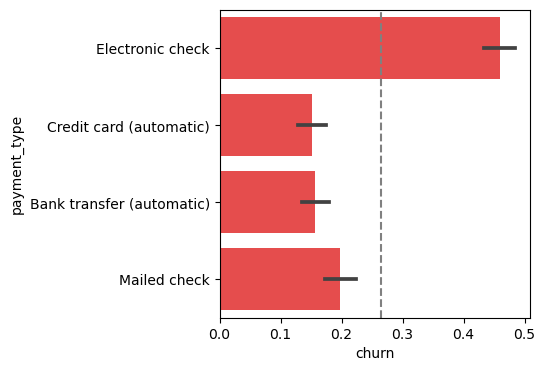

In [5]:
# explore churn and payment type
e.explore_cat(train,'churn','payment_type')

**With an alpha of 0.05 (confidence 95%) the p-value is less than alpha. Therefore, evidence suggests that payment type and churn are not independent from each other. I believe that using `payment_type` in the modeling will have a positive impact on the accuracy.**

### 2) Is Churn independent from internet Service type?
* $H_0$: Churn is independent from internet service type
* $H_a$: Churn is **NOT** independent from internet service type
* Discrete (churn) vs Discrete (internet_service_type) = $Chi^2$
    - $Chi^2$ = 402.162525
    - $p$ = 4.693721e-88
* `Churn` is **NOT** independent from `internet service type`

Chi2: 402.162525170296, p-value: 4.693720719529299e-88


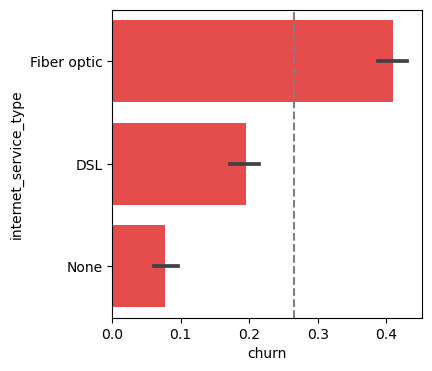

In [6]:
# explore churn and internet service type
e.explore_cat(train,'churn','internet_service_type')

**With an alpha of 0.05 (confidence 95%) the p-value is less than alpha. Therefore, evidence suggests that internet service type and churn are not independent from each other. I believe that using `internet_service_type` in the modeling will have a positive impact on the accuracy.**

### 3) Is Churn independent from paperless billing?
* $H_0$: Churn is independent from paperless billing
* $H_a$: Churn is **NOT** independent from paperless billing
* Discrete (churn) vs Discrete (paperless billing) = $Chi^2$
    - $Chi^2$ = 174.0170668905212
    - $p$ = 9.814255558186946e-40
* `Churn` is **NOT** independent from `paperless billing`

Chi2: 174.0170668905212, p-value: 9.814255558186946e-40


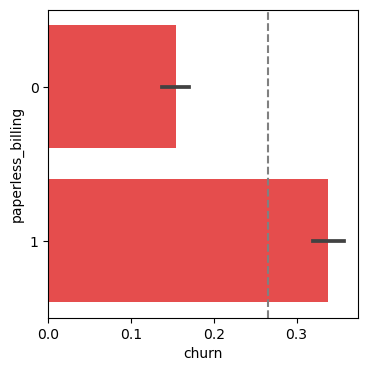

In [7]:
# explore churn and paperless billing
e.explore_int(train,'churn','paperless_billing')

**With an alpha of 0.05 (confidence 95%) the p-value is less than alpha. Therefore, evidence suggests that paperless billing and churn are not independent from each other. I believe that using `paperless_billing` in the modeling will have a positive impact on the accuracy.**

### 4) Is there a difference in Churn based on ?
* $H_0$: There is **NO** difference in Churn based on monthly charges
* $H_a$: There is a difference in Churn based on monthly charges
* Discrete (churn) vs Continuous (monthly_charges) = $Mann$-$Whitney$ $U$
    - $Mann$-$Whitney$ $U$ statistic = 1351248.0
    - $p$ = 1.261599899747347e-28
* There is a difference in `Churn` based on `monthly charges`

monthly_charges 
____________________
Mann-Whitney Test:
 stat = 2128336.0, p = 1.261599899747347e-28
____________________


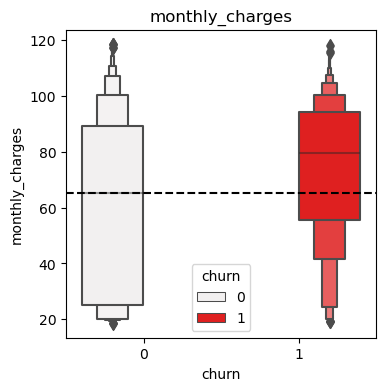

In [8]:
# explore churn and monthly charges
e.explore_bivariate_quant(train,'churn','monthly_charges')

#### 4.1) Is monthly charges higher on average for customers churned compared to those who have not churned?
* $H_0$: Churned has **lower or equal** monthly charges
* $H_a$: Churned has **higher** monthly charges
* Discrete (churn) vs Continuous (monthly_charges) = $Mann$-$Whitney$ $U$
    - $Mann$-$Whitney$ $U$ statistic = 1351248.0
    - $p$ = 1.261599899747347e-28
* The `monthly charges` on average is **higher** for `Churn`

In [9]:
# compare means for greater than of monthly charges for churn
e.compare_means(train,'churn','monthly_charges','greater')

Mann-Whitney Test:
 stat = 2128336.0, p = 6.307999498736735e-29


**With an alpha of 0.05 (confidence 95%) the p-value is less than alpha. Therefore, evidence suggests that there is a difference in monthly charges between churned and active customers. In fact, monthly charges is greater on average for customers who have churned compared to monthly charges of customers who haven't. I believe that using `monthly_charges` in the modeling will have a positive impact on the accuracy.**

### Are there any features that are independent from Churn?
* $H_0$: Churn is independent from gender
* $H_a$: Churn is **NOT** independent from gender
* Discrete (churn) vs Discrete (gender) = $Chi^2$
    - $Chi^2$ = 1.4668271981736136 
    - $p$ = 0.22584695828761636
* $H_0$: Churn is independent from phone service
* $H_a$: Churn is **NOT** independent from phone service
* Discrete (churn) vs Discrete (phone_service) = $Chi^2$
    - $Chi^2$ = 0.0 
    - $p$ = 1.0
* `Churn` **is** independent from both `gender` and `phone_service`

Chi2: 1.4668271981736136, p-value: 0.22584695828761636


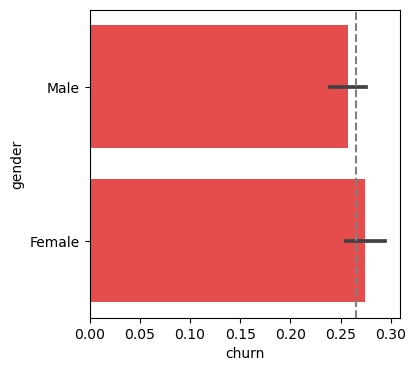

In [10]:
# explore churn and gender
e.explore_cat(train,'churn','gender')

Chi2: 0.0, p-value: 1.0


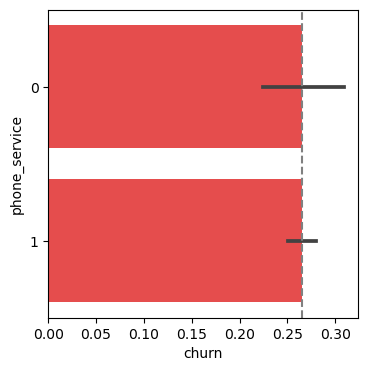

In [11]:
# explore churn and phone service
e.explore_int(train,'churn','phone_service')

**With an alpha of 0.05 (confidence 95%) the p-values are greater than alpha. Therefore, evidence suggests that gender and phone service vs churn are independent from each other. I believe that using `gender` and `phone_service` in the modeling will not have much of an impact on the accuracy.**

## Exploration Summary
* Payment type was found to be a driver of churn
    - Electronic check payment being the most common among churn
* Internet service type was found to be a driver of churn
    - Fiber optic internet being the most common among churn
* Paperless billing was found to be a driver of churn
    - Having paperless billing being the most common among churn
* Monthly charges was found to be a driver of churn
    - Higher average monthly charges amongst churn
* Gender and phone service were found to not be a driver of churn


### Features for modeling
* Features that will be used:
    - churn (target)
* Some features that may be useful:
    - payment type
    - internet service type
    - paperless billing
    - monthly charges
* Some features that may not be useful:
    - gender
    - phone service

## Modeling

* Accuracy will be the evaluation metric
    - Given more time I can evaluate with other metrics
* Target feature is Churn
    - 27% Churn
    - 73% Active
* Guessing Active for every customer gives an accuracy of 73%
    - 73% will be the baseline accuracy
* Models will be developed and evaluated using 4 different model types, various features, and various hyperparameter configurations
    - Decision Tree
    - Random Forest
    - KNN
    - Logistic Regression
* Models will be evaluated on train and validate datasets
* Best performing model will be the only one evaluated on the test dataset

In [12]:
# get baseline accuracy
e.baseline(train.churn)

Baseline: 73.47% Accuracy


### Best of 4 Model Types

#### Decision Tree

In [13]:
# get decision tree results
m.val_dt()

Decision Tree 

Accuracy on train: 80.64 

Accuracy on validate: 78.14


#### Random Forest

In [14]:
# get random forest results
m.val_rf()

Random Forest 

Accuracy on train: 82.98 

Accuracy on validate: 78.92


#### KNN

In [15]:
# get knn results
m.val_knn()

K Nearest Neighbors 

Accuracy on train: 80.54 

Accuracy on validate: 77.29


#### Logistic Regression

In [16]:
# get logistic regression results
m.val_lr()

Logistic Regression 

Accuracy on train: 79.72 

Accuracy on validate: 78.57


### Logistic Regression on Test
* Logistic Regression seemed to be the best fit with the least amount of difference between train and validate accuracy

In [17]:
# get test results for final model
m.test_model()

Logistic Regression 

Accuracy on test: 80.7 



### Modeling Wrap 
* Decision Tree, Random Forest, and KNN had between 2.5-4% difference for train and validate
* Logistic Regression had about 1% difference for train and validate, best overall
* With the test done on Logistic Regression, we get an 80.7% accuracy
    - 80.7% is higher than our baseline of 73.47%

## Conclusion

### Takeaways and Key Findings
* Payment type was found to be a driver of churn
  - Electronic check being the most common among churn
* Fiber optic internet being a driver of churn was surprising considering it has faster internet speeds
* Paperless billing was found to be a driver of churn
    - Having it enabled was the most common among churn
* Monthly charges was found to be a driver of churn, higher charges for churn
* Gender and phone service were found to not be a driver of churn

### Recommendations
* Check with the finance department to figure out if there are issues with electronic check
* Check with internet department to see if there are frequent issues with Fiber optic internet
* Check with tech support technicians and see what can be done for customers to choose tech support as an internet package

### Next Steps
* Given more time I could check what is causing the high monthly charges that lead to customers churning